## Visualization 5: Relationship between NBA Player of the Week and Team Location

Note: This notebook requires `maps` and `mapdata` which could be installed by running `install.packages(c("maps", "mapdata"))` in R

In [1]:
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(maps)
%R library(mapdata)

import pandas as pd
import numpy as np
from utils import pd2r

In [2]:
location = pd2r(pd.read_csv('../data/scraped/NBA_Location.csv'))
%R -i location

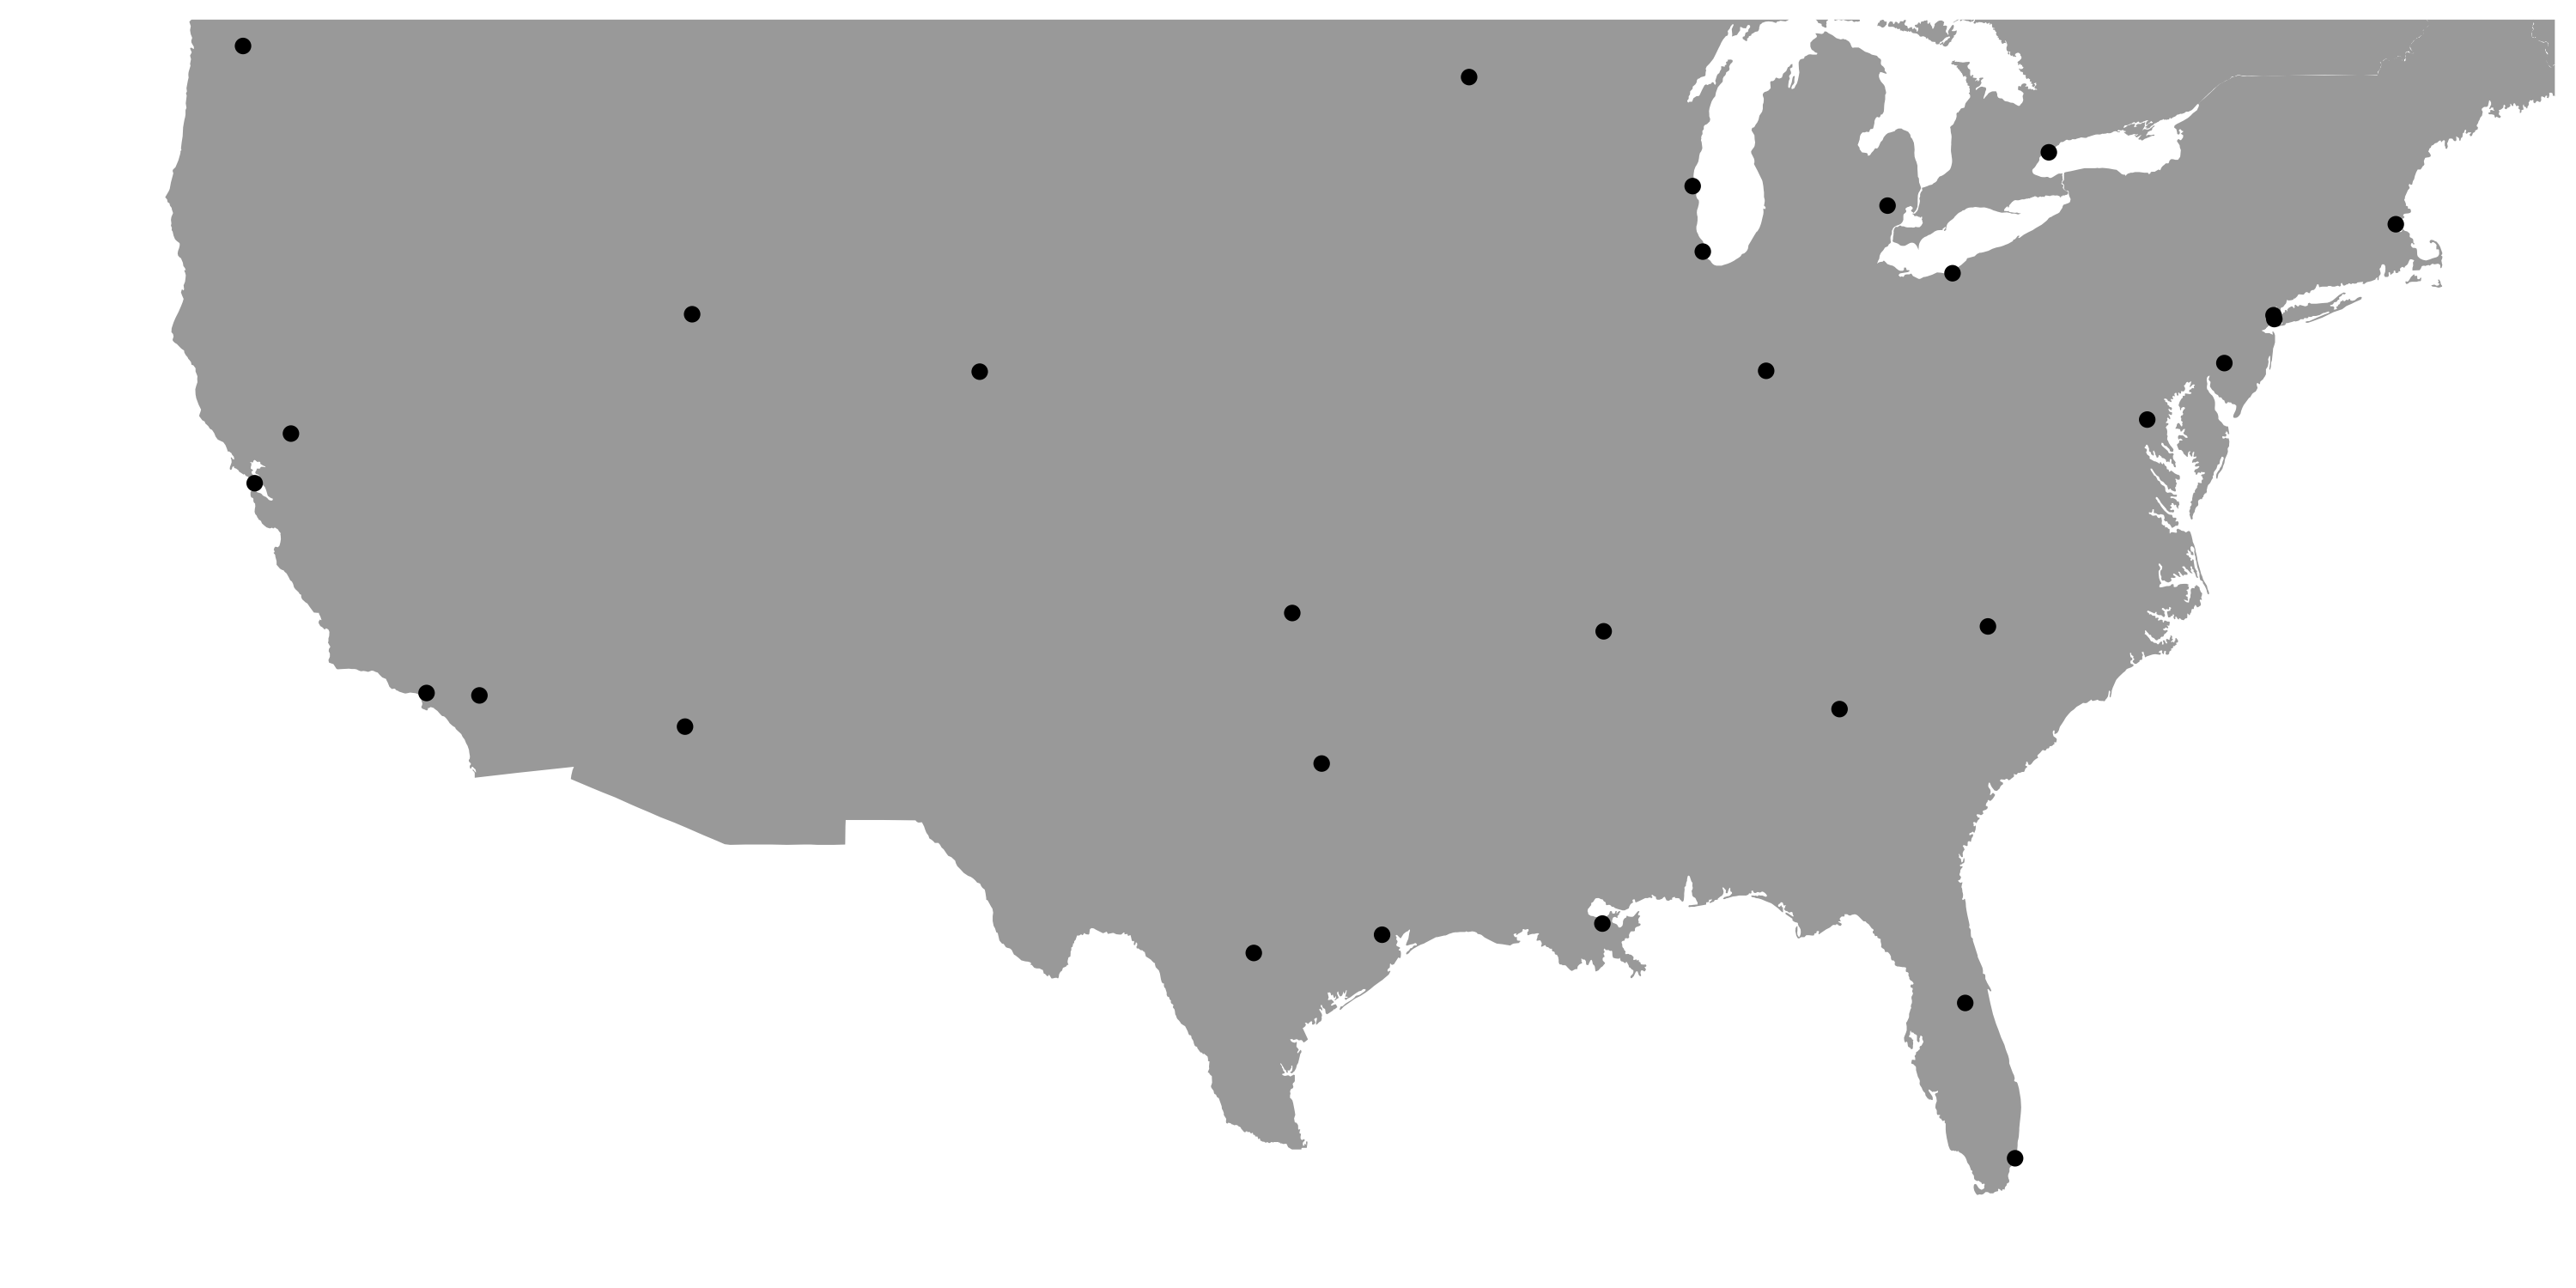

In [3]:
%%R -w 10 -h 5 --units in -r 300
usa <- map_data('usa')
canada <- map_data('worldHires', 'Canada')

ggplot() +
geom_polygon(data = usa, aes(x = long, y = lat, group = group), fill = 'darkgray') +
geom_polygon(data = canada, aes(x = long, y = lat, group = group), fill = 'darkgray') +
geom_point(data = location, aes(x = longitude, y = latitude)) +
coord_fixed(xlim = c(-125, -70), ylim = c(25, 45), ratio = 1.35) +
theme_minimal() +
theme(axis.text = element_blank(),
      axis.line = element_blank(),
      axis.ticks = element_blank(),
      panel.border = element_blank(),
      panel.grid = element_blank(),
      axis.title = element_blank())

In [4]:
potw = pd.read_csv('../data/raw/NBA_Player_of_the_Week.csv')
potw = potw.loc[potw['Season short'] > 1990]

In [5]:
potw_count = potw.groupby('Team').count()['Player'].reset_index()
location_new = location[['Team','latitude','longitude']]
potw_count.loc[potw_count.Team == 'Philadelphia Sixers', 'Team'] = 'Philadelphia 76ers'

In [6]:
loc_potw_ct = pd.merge(location_new,potw_count, on = 'Team', how = 'left')
# loc_potw_ct.sort_values('Player')

In [7]:
%R -i loc_potw_ct

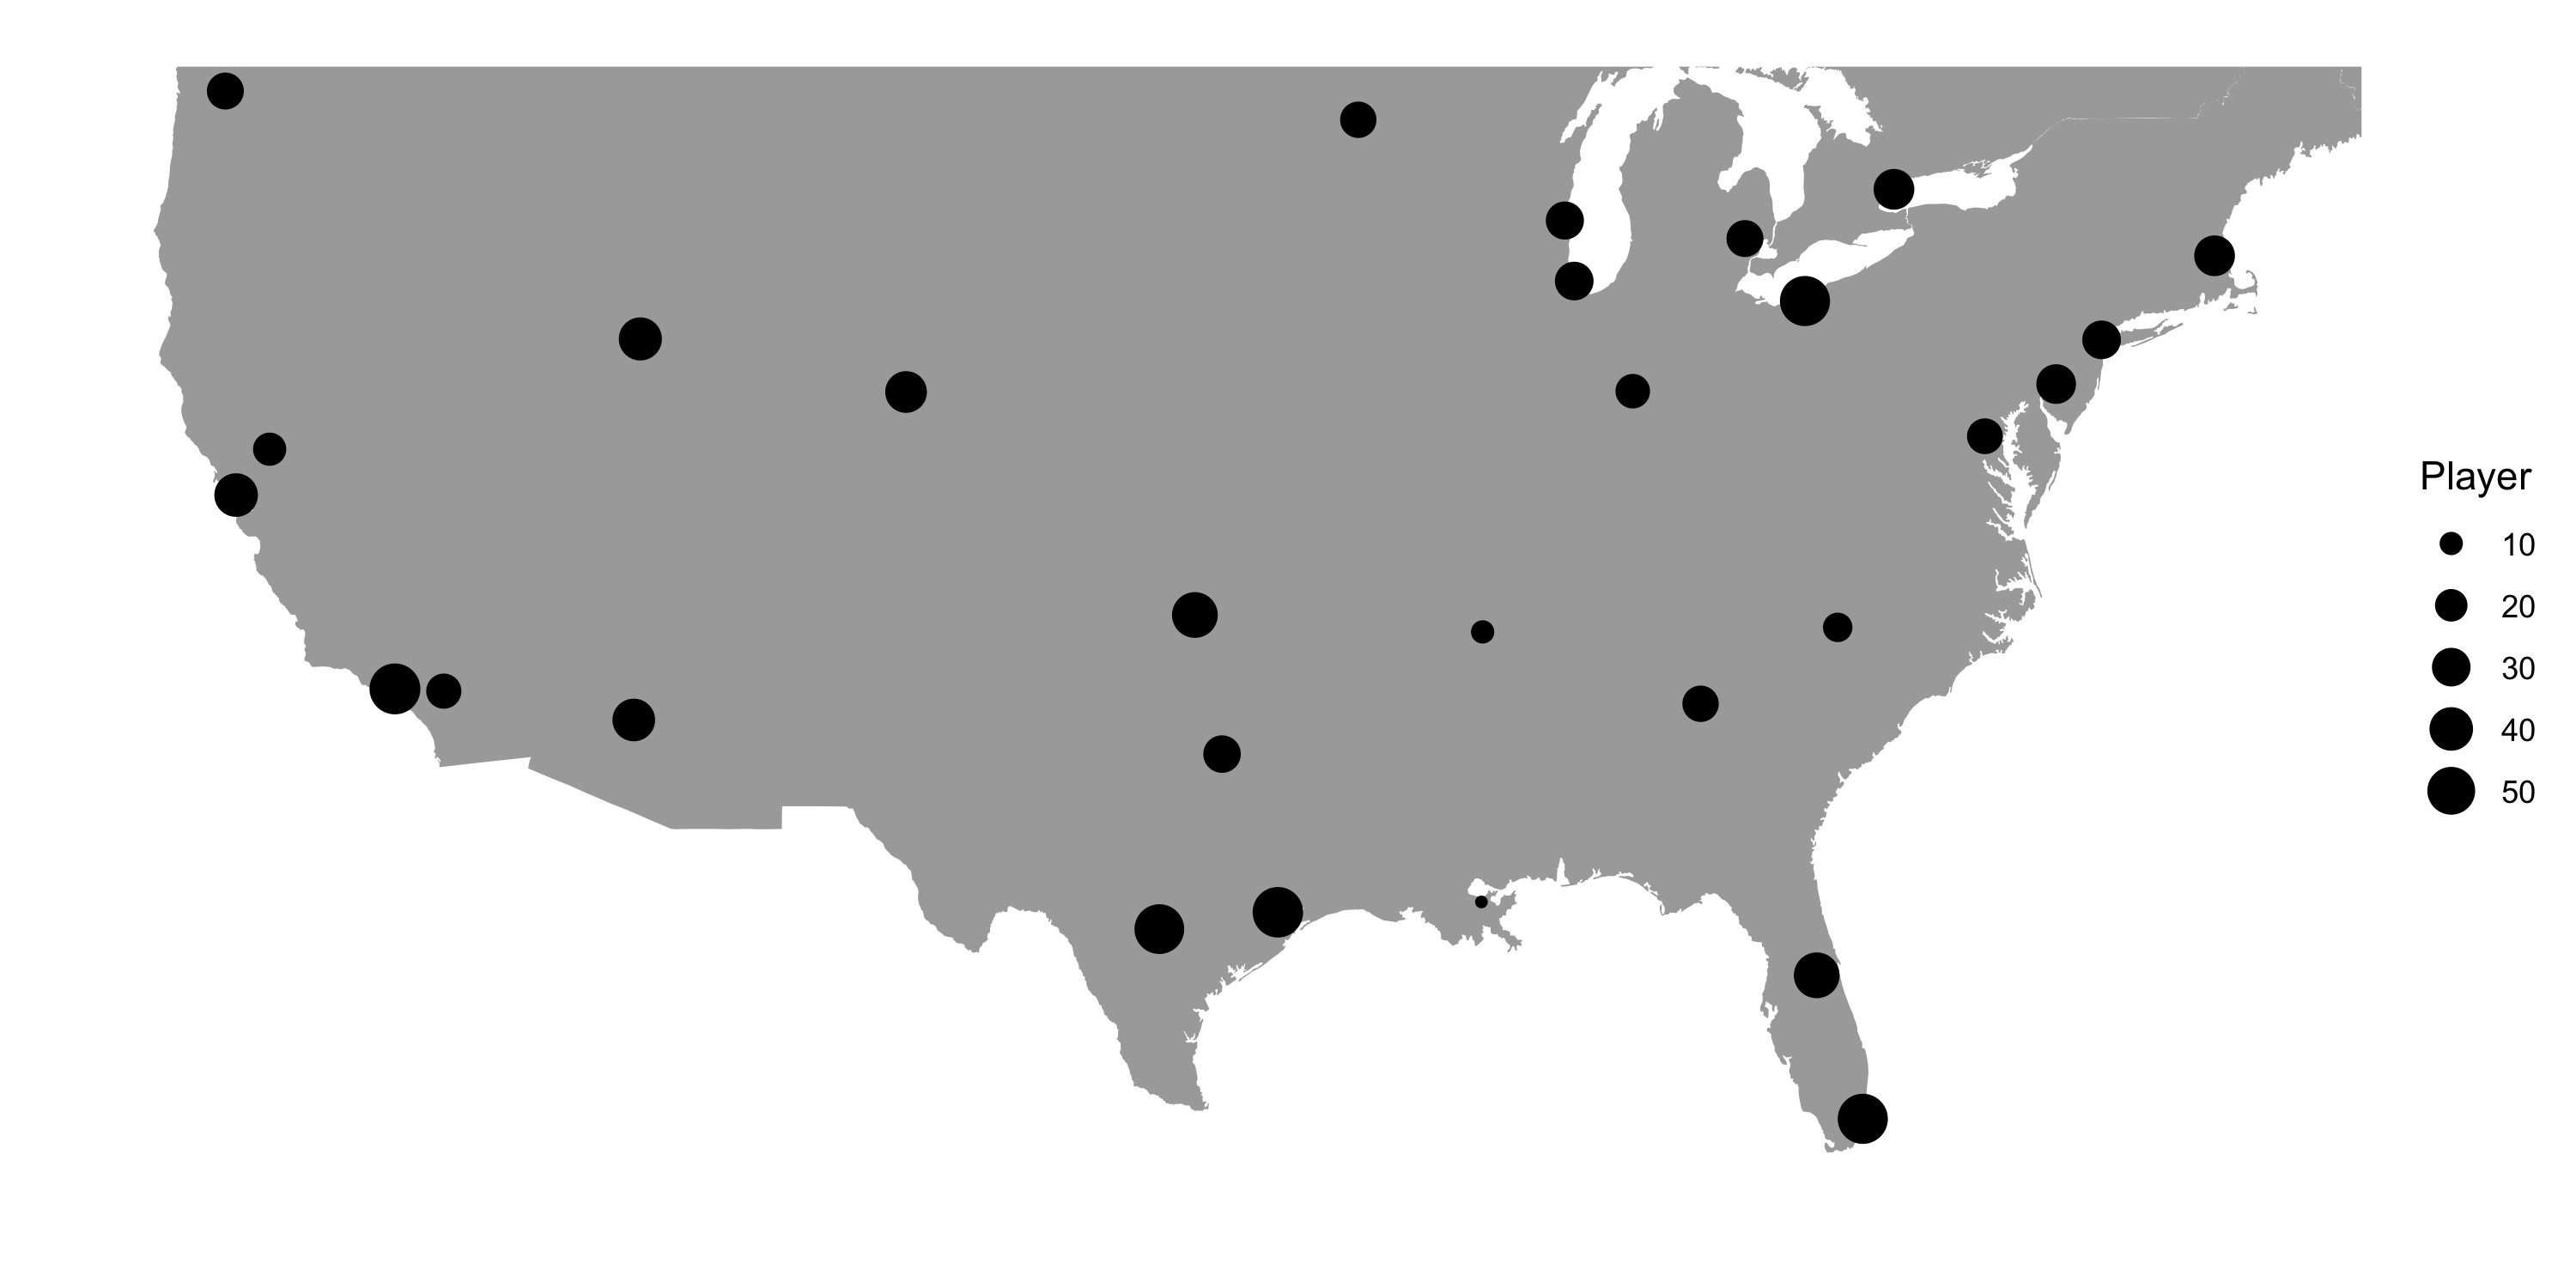

In [8]:
%%R -w 10 -h 5 --units in -r 300
usa <- map_data('usa')
canada <- map_data('worldHires', 'Canada')

ggplot() +
geom_polygon(data = usa, aes(x = long, y = lat, group = group), fill = 'darkgray') +
geom_polygon(data = canada, aes(x = long, y = lat, group = group), fill = 'darkgray') +
geom_point(data = loc_potw_ct, aes(x = longitude, y = latitude, size = Player)) +
coord_fixed(xlim = c(-125, -70), ylim = c(25, 45), ratio = 1.35) +
theme_minimal() +
theme(axis.text = element_blank(),
      axis.line = element_blank(),
      axis.ticks = element_blank(),
      panel.border = element_blank(),
      panel.grid = element_blank(),
      axis.title = element_blank())